![data-x](https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png)


# Data-X: Introduction to TensorFlow 2.0, Tensorboard, and Keras

**Author:** Alexander Fred-Ojala

**Sources:** Francois Chollet, Sebastian Raschka, Aurélien Géron, etc.

**Copright:** Feel free to do whatever you want with this code.

___

## TensorFlow:
TensorFlow is the most popular and adopted free and open-source deep learning library. It was first developed and maintained by Google. It can be used for both research and production.

## **TensorFlow benefits:**
- Highly efficient
- Cross-platform (works on IOS, Android, Unix, Windows, in the cloud, in the browser etc etc)
- Calculates gradients automatically (this is truly useful for Neural Networks, where the analytical solution of gradients would be VERY tedious to derive).
* Deep integration with the Keras library (Functional approach, as well as high-level wrapper)

# General notebook setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Install TensorFlow 2.0

TensorFlow 2.x is a major change from TensorFlow 1.x (not backwards compatible, however you can use a tool to convert your TensorFlow 1.x code to 2.x).

The new version is designed to be more pythonic. It's  easier to debug models, extract values during training (because of the need of sessions and graphs in TensorFlow 1.x). 

TensorFlow 2.x supports eager execution by default, so you don't need a session and to evaluate operations / tensors in order to extract values.

In [4]:
#!pip install tensorflow
# or for GPU version:
# !pip install tensorflow-gpu

# Import TensorFlow

In [5]:
# Canonical way of importing TensorFlow
import tensorflow as tf

# If this doesn't work TensorFlow is not installed correctly

# TensorFlow 2.0
At the time of the update of this notebook we are still in the early days of TensorFlow, and currently (Oct 22) the version 2.0.0 has just been released.

In [6]:
# Check tf version, oftentimes tensorflow is not backwards compatible
tf.__version__

# should be tensorflow 2

'2.0.0'

# Intro to TensorFlow
### Core components:

#### 1. Tensor
A Tensor in TensorFlow is an N-dimensional array (just like Numpys array object). Tensors are multilinear maps from vector spaces to real numbers. Scalars, vectors and matrices are all tensors. The Tensor represents units of data in TensorFlow.

Numpy arrays or Pandas DataFrames sent to Tensorflow functions are automatically converted into TensorFlow tensors.

#### 2. Operations / Ops
TensorFlow operations or ops are units / edges / nodes of computation (e.g. matrix multiplication, addition, etc.)

#### 3. Computation Graph
The computational graph is is an optimized, compiled representation of the dataflow and the order of computations that are sent to an execution environment (for example during model training).

TensforFlow 2.x supports eager execution, but when we build a model and then train it TensorFlow can compile the model and optimize the executions as a computational graph object. This is done by decorating a function with `@tf.function`.

This computational graph is then  sent to another instance / runtime environment (e.g. on a CPU or GPU) for execution. The results are sent back to us. This makes TensorFlow computations highly distributable and it also allows us to automatically evaluate all gradients in the computation nodes.

![](imgs/tf_graph.png)

TensorFlow 2.x supports eager execution by default.

In [7]:
tf.executing_eagerly() 

True

# TensorBoard setup
Tip2: Setup TensorBoard if you want to monitor and analyze computational graphs etc.

In [8]:
from datetime import datetime
import os
import pathlib

t = datetime.utcnow().strftime("%Y%m%d%H%M%S") 
log_dir = "tf_logs"
logd = "{}/r{}/".format(log_dir, t)

# Make directory if it doesn't exist

from pathlib import Path
home = str(Path.home())

logdir = os.path.join(os.sep,home,logd)

if not os.path.exists(logdir):
    os.makedirs(logdir)

In [9]:
logdir

'/Users/afo/tf_logs/r20191023085621/'

# 1. TensorFlow tensors

## 1.1 tf.constant

Constants are initialized directly and eager execution let's us see the values without creating a session and running the tensor.

In [10]:
a = tf.constant(2)
b = tf.constant(5)

In [11]:
a # note the numpy value

<tf.Tensor: id=0, shape=(), dtype=int32, numpy=2>

The .numpy() method will return the result as a numpy array.

In [12]:
# Eager evaluation of tensors
a.numpy()

2

### We can also perform operations on tensors

In [20]:
a*b

<tf.Tensor: id=7, shape=(), dtype=int32, numpy=10>

#### or the same with universal functions

In [14]:
tf.multiply(a,b).numpy()

10

In [15]:
a_matrix = tf.constant([[1,2], [3,4]])
b_matrix = tf.constant([[5,6], [7,8]])
b_matrix

<tf.Tensor: id=5, shape=(2, 2), dtype=int32, numpy=
array([[5, 6],
       [7, 8]], dtype=int32)>

In [16]:
tf.matmul(a_matrix, b_matrix)

<tf.Tensor: id=6, shape=(2, 2), dtype=int32, numpy=
array([[19, 22],
       [43, 50]], dtype=int32)>

##### Note, we cannot reassign values of constants (like we can with Variables).

In [17]:
a.assign(8)

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

## 1.2 tf.Variable

Variables are mutable and can be updated and reassigned new values. Variables are usually weights and biases of a model that are optimized during training, they also indicate the degrees of freedom of the model (what model parameters that can change, thus making the model flexible).

In [21]:
var = tf.Variable(3.)
var

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

In [22]:
# Reassign the value of a Variable
var.assign(4)
var

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.0>

In [23]:
var.numpy()

4.0

In [24]:
# we can also create multi dim Variables.
d = tf.Variable(np.random.randn(3).reshape(3,1)) #reshape
# automatically assings data type
d #

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float64, numpy=
array([[ 1.41305744],
       [ 0.67772036],
       [-0.56180927]])>

In [26]:
# inplace increase / decrease Variable values

var.assign(10)
print('original value:', var.numpy())
print('add 1:', var.assign_add(1.).numpy())
print('subtract 5:', var.assign_sub(5.).numpy())

original value: 10.0
add 1: 11.0
subtract 5: 6.0


### Variables also have a lot of attributes associated with them:

In [27]:
v = tf.Variable([[3.,3.2], [1.2,2.2]], dtype=tf.float32, name='my_variable')

print('name  : ', v.name)
print('type  : ', v.dtype)
print('shape : ', v.shape)
print('device: ', v.device)

name  :  my_variable:0
type  :  <dtype: 'float32'>
shape :  (2, 2)
device:  /job:localhost/replica:0/task:0/device:CPU:0


<div class='alert alert-info'><b>Note</b>: Tensorflow is really similar to NumPy, and you can think of the tensors as an ndimensional array.</div>


![tf_to_np](imgs/tf_to_np.png)
Source: CS227d, NLP, Stanford

# 2. Operations / Ops
Operations can be carried out directly or assigned to variables.

In [28]:
op1 = tf.add(a,b)
op1

<tf.Tensor: id=47, shape=(), dtype=int32, numpy=7>

In [29]:
a+b # same as tf.add

<tf.Tensor: id=48, shape=(), dtype=int32, numpy=7>

In [30]:
v = a+b
u = v+2
w = v*u
z = w*3
z

<tf.Tensor: id=54, shape=(), dtype=int32, numpy=189>

## Look at the computational graph with @tf.function

`@tf.function` is a very useful module that can be used to convert simple python functions into a highly optimized computational graph that can be run on any runtime environment. When we build a model and then train it TensorFlow we can compile the model and optimize the executions.

In [31]:
@tf.function
def func(a,b):
    with tf.name_scope('first'):
        z = tf.multiply(a,b, name='z')
    with tf.name_scope('second'):
        y1 = tf.constant(3, name='3')
        y2 = tf.constant(4)
        w1 = tf.add(z, y1, name='w1')
        w2 = tf.add(z, y2, name='w2')
        
    return(w1+w2)

In [32]:
logdir

'/Users/afo/tf_logs/r20191023085621/'

In [33]:
# Setup a writer to save graph information and TensorFlow logs
# To be displayed with Tensorboard

writer = tf.summary.create_file_writer(logdir)
tf.summary.trace_on()

In [34]:
a = tf.constant(3)
b = tf.constant(4)
func(a,b)
with writer.as_default():
    tf.summary.trace_export(
        name="func",
        step=0,
        profiler_outdir=logdir)

In [35]:
logdir

'/Users/afo/tf_logs/r20191023085621/'

In [37]:
!echo $logdir

/Users/afo/tf_logs/r20191023085621/


In [38]:
# run tensorboard in the shell
!tensorboard --logdir $logdir

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.0.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


### tf.function and Conditional statements
It is difficult to use conditions in graphs but we could implement that easily using `@tf.function` decorator 

In [39]:
@tf.function 
def g(x):
    y = tf.reduce_sum(x)
    if y > 0:
        return y
    return tf.abs(y)

In [40]:
print(tf.autograph.to_code(g.python_function))

def tf__g(x):
  do_return = False
  retval_ = ag__.UndefinedReturnValue()
  with ag__.FunctionScope('g', 'g_scope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as g_scope:
    y = ag__.converted_call(tf.reduce_sum, g_scope.callopts, (x,), None, g_scope)

    def get_state():
      return ()

    def set_state(_):
      pass

    def if_true():
      do_return = True
      retval_ = g_scope.mark_return_value(y)
      return retval_, do_return

    def if_false():
      do_return = True
      retval_ = g_scope.mark_return_value(ag__.converted_call(tf.abs, g_scope.callopts, (y,), None, g_scope))
      return retval_, do_return
    cond = y > 0
    retval_, do_return = ag__.if_stmt(cond, if_true, if_false, get_state, set_state, ('retval_', 'do_return'), ())
  do_return,
  return ag__.retval(retval_)



# Calculate gradients

Gradient evaluation is very importnat machine learning because it is based on function optimization. You can use `tf.GradientTape()` method to record the gradient of an arbitrary function

In [41]:
w = tf.Variable(3.0)

# Gradient scope for the function w^2
with tf.GradientTape() as tape:
    square_w = w * w

grad = tape.gradient(square_w, w)
print(f'The gradient of w^2 at {w.numpy()} is {grad.numpy()}')

The gradient of w^2 at 3.0 is 6.0


### Gradient of the Sigmoid function
In this example we evaluate the gradient of the sigmoid function 

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

Note that 

$$\sigma'(x) = \frac{e^{-x}}{(1+e^{-x})^2} = \sigma(x)(1-\sigma(x)) $$

For instance 

$$\sigma'(0) = \sigma(0)(1-\sigma(0)) = \frac{1}{2}\left(1-\frac{1}{2} \right) = \frac{1}{4}$$

In [42]:
def sigmoid(x):
    return 1/(1 + tf.exp(-x))

In [49]:
#define a varaible
x = tf.Variable(1.)

#record the gradient
with tf.GradientTape() as tape:
    sig = sigmoid(x)
    
res = tape.gradient(sig, x).numpy()
print('The gradient of the sigmoid function at {} is '.format(x.numpy()), res)

The gradient of the sigmoid function at 1.0 is  0.19661194


# Linear Regression in TensorFlow

This example is refactored from https://www.tensorflow.org/guide/eager. We create a complete example of using linear regression to predict the paramters of the function 

$$y = f(x) + noise = 3 x + 2 + noise$$

Given a point $x$ we want to predict the value of $f(x)$. We train the model on 100 data pairs $(x,y)$. 

We want the model to learn a linear model 

$$\hat{y} = W x + b$$

Note that, we use `tf.GradientTape` to record the gradient of the loss function with respect our model paramters.  

We use MSE to calcuate the loss 

$$MSE = \frac{1}{100} (y-\hat{y})^2$$

We use Gradient Descent to update the paramters 

$$W = W - \alpha  \frac{\partial MSE}{\partial W}$$

$$b = b - \alpha  \frac{\partial MSE}{\partial b}$$

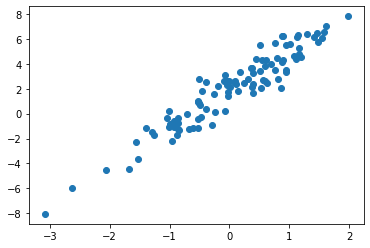

In [50]:
#100 data points 
NUM_EXAMPLES = 100

#define inputs and outputs with some noise 
X = tf.random.normal([NUM_EXAMPLES])  #inputs 
noise = tf.random.normal([NUM_EXAMPLES]) #noise 
y = X * 3 + 2 + noise  #true output

plt.scatter(X, y)

# Contruction Phase

In [51]:
#create model paramters with initial values 
W = tf.Variable(0.)
b = tf.Variable(0.)

In [54]:
#training info
train_steps = 300
learning_rate = 0.01

In [55]:
tf.summary.trace_on() # trace graph


#watch the gradient flow
@tf.function  # Make it fast.
def train_on_batch(X, y):
    with tf.GradientTape() as tape:
        #forward pass 
        yhat = X * W + b

        #calcuate the loss (difference squared error)
        error = yhat - y
        loss = tf.reduce_mean(tf.square(error))

    #evalute the gradient with the respect to the paramters
    dW, db = tape.gradient(loss, [W, b])

    #update the paramters using Gradient Descent  
    W.assign_sub(dW * learning_rate)
    b.assign_sub(db* learning_rate)

    return(loss)

In [56]:
#print the loss every 20 iterations
for i in range(train_steps):
    loss = train_on_batch(X,y)
    
    if i % 20 == 0:
        with writer.as_default():
            tf.summary.scalar('loss', loss, step=i)
        print("Loss at step {:03d}: {:.3f}".format(i, loss))
        
        
print(f'W : {W.numpy()} , b  = {b.numpy()} ')

Loss at step 000: 13.201
Loss at step 020: 6.426
Loss at step 040: 3.379
Loss at step 060: 2.006
Loss at step 080: 1.385
Loss at step 100: 1.103
Loss at step 120: 0.976
Loss at step 140: 0.917
Loss at step 160: 0.891
Loss at step 180: 0.879
Loss at step 200: 0.873
Loss at step 220: 0.870
Loss at step 240: 0.869
Loss at step 260: 0.869
Loss at step 280: 0.868
W : 2.984617233276367 , b  = 1.8857847452163696 


In [57]:
loss = train_on_batch(X,y)
with writer.as_default():
        tf.summary.trace_export(
        name="linreg",
        step=0,
        profiler_outdir=logdir)

In [58]:
!tensorboard --logdir $logdir

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.0.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


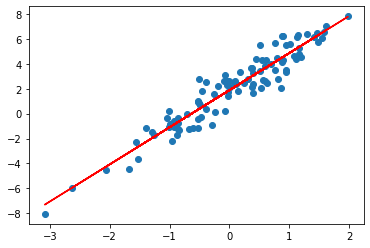

In [59]:
plt.scatter(X, y)
plt.plot(X, b+W*X, color='red')

----

# Neural Network with TensorFlow and Keras

These tutorials use `tf.keras`, TensorFlow's high-level Python API for building and training deep learning models. To learn more about using Keras with TensorFlow, see the TensorFlow Keras Guide.

TensorFlow 2.x has integrated Keras and all it's functionality. Import all functionality from `tf.keras`

# Why Keras
Modular, powerful and intuitive Deep Learning python library built on TensorFlow, CNTK, Theano.
* Minimalist, user-friendly interface
* Modular
* Deep integration with Tensorflow (`tf.keras`)
* Works on CPUs and GPUs
* Open-source, developed and maintained by a community of contributors, and
publicly hosted on github
* Extremely well documented, lots of working examples: https://keras.io/
* Very shallow learning curve —> it is by far one of the best tools for experimenting, both for beginners and experts
* Easy to extend
* Similar to scikit-learn's API and syntax calls

# Keras "Hello World" on Iris

### Data preprocessing

In [60]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

data = datasets.load_iris()

print(data.DESCR[:1011])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [61]:
x = data['data']
y = data['target']

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [62]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [63]:
# one hot encode y
import pandas as pd

y = pd.get_dummies(y).values
y[:5,:]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [64]:
# train test split, plus randomize
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, test_size=0.4,
                                                    random_state=1337,
                                                   shuffle=True)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(90, 4)
(90, 3)
(60, 4)


### The Sequential model
The simplest model in Keras is the Sequential model, a linear stack of layers. In Keras, you assemble layers to build models. A model is (usually) a graph of layers. The most common type of model is a stack of layers: the `tf.keras.Sequential` model.

To build a simple, fully-connected network (i.e. multi-layer perceptron):

* **Sequential model** Allows us to build NNs like legos, by adding one layer on top of the other, and swapping layers

In [70]:
# Core data structure in Keras is a model
# The model is an object in which we organize layers

In [71]:
# model initialization
from tensorflow.keras.models import Sequential

model = Sequential() # instantiate empty Sequential model

We can import layer classes and stack layers (in an NN model for example), by using `.add()`

# Specifying the input shape

The model needs to know what input shape it should expect. For this reason, the first layer in a  Sequential model needs to receive information about its input shape.

**The following snippets are strictly equivalent:**
> * `model.add(Dense(32, input_shape=(784,)))`
> * `model.add(Dense(32, input_dim=784))`

# Construction Phase

In [72]:
# model contruction (architecture build computational graph)
from tensorflow.keras.layers import Dense

model.add( Dense(units=64, activation='relu', \
                 input_shape=(4,) ))

model.add( Dense(units=3, activation='softmax') )

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


# Compilation phase, specify learning process

Run `.compile()` on the model to specify learning process.

Before training a model, you need to configure the learning process, which is done via the  compile method. It receives three arguments:

* **A loss function:** This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as `categorical_crossentropy` or `mse`), or it can be an objective function.
* **An optimizer:** This could be the string identifier of an existing optimizer (such as `rmsprop`, `gradientdescent`, or `adam`), or an instance of the Optimizer class.
* **(Optional) A list of metrics:** For any classification problem you will want to set this to `metrics=['accuracy']`. A metric could be the string identifier of an existing metric or a custom metric function.

In [74]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

## We can also specify our own optimizer or loss function (even build it ourselves)

```python
# or with we can specify loss function or optimizer

from tensorflow.keras.optimizers import SGD

model.compile(loss = 'categorical_crossentropy',
             optimizer = SGD(lr=0.001, momentum = 0.9, nesterov=True),
             metrics = ['accuracy'])
```

### Different optimizers and their trade-offs
To read more about gradient descent optimizers, hyperparameters etc. This is a recommended reading: http://ruder.io/optimizing-gradient-descent/index.html

### Training
Keras models are trained on Numpy arrays of input data and labels. For training a model, you will typically use the fit function.

In [76]:
# Fit the model by iterating over the training data in batches

model.fit(X_train, y_train, epochs = 50, batch_size= 32)

Train on 90 samples
Epoch 1/50
90/90 [==============================] - 0s 6ms/sample - loss: 1.8986 - accuracy: 0.3556
Epoch 2/50
90/90 [==============================] - 0s 51us/sample - loss: 1.7158 - accuracy: 0.3556
Epoch 3/50
90/90 [==============================] - 0s 48us/sample - loss: 1.5377 - accuracy: 0.3556
Epoch 4/50
90/90 [==============================] - 0s 67us/sample - loss: 1.3919 - accuracy: 0.3556
Epoch 5/50
90/90 [==============================] - 0s 75us/sample - loss: 1.2731 - accuracy: 0.3556
Epoch 6/50
90/90 [==============================] - 0s 94us/sample - loss: 1.1960 - accuracy: 0.3556
Epoch 7/50
90/90 [==============================] - 0s 215us/sample - loss: 1.1307 - accuracy: 0.3556
Epoch 8/50
90/90 [==============================] - 0s 143us/sample - loss: 1.0879 - accuracy: 0.3556
Epoch 9/50
90/90 [==============================] - 0s 206us/sample - loss: 1.0530 - accuracy: 0.3556
Epoch 10/50
90/90 [==============================] - 0s 121us/sample 

In [77]:
# # Evaluate the model Accuracy on test set
model.evaluate(X_test, y_test,verbose=False)[1]

0.96666664

In [78]:
# Predictions on new data:

class_probabilities = model.predict(X_test)

# gives output of the softmax function

In [79]:
class_probabilities[:5,:]

array([[0.11354923, 0.47556344, 0.41088742],
       [0.74483174, 0.17556019, 0.07960802],
       [0.03163455, 0.43425244, 0.534113  ],
       [0.69440687, 0.20829034, 0.09730276],
       [0.02472844, 0.41382325, 0.5614484 ]], dtype=float32)

-------

# Deep Learning

The upcoming section will train neural networks / multilayered perceptrons. Make sure you're familiar with these concepts (activation functions, backpropogation, optimizers, softmax etc). Check the presentations in the Github folder.

**Also watch 3Blue1Brown's fantastic animation on how DNNs are trained and how they classify:**

In [2]:
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/aircAruvnKk?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

# MNIST: Intro to NN in TensorFlow

Example taken from Google Docs

We are now going to recognize hand-written digits.

![https://www.tensorflow.org/images/MNIST.png](https://www.tensorflow.org/images/MNIST.png)

# About the most classic NN dataset
The MNIST data is split into three parts: 60,000 data points of training data (mnist.train), 10,000 points of test data (mnist.test).

Every MNIST data point has two parts: an image of a handwritten digit and a corresponding label. We'll call the images "x" and the labels "y". Both the training set and test set contain images and their corresponding labels; for example the training images are mnist.train.images and the training labels are mnist.train.labels.

Each image is 28 pixels by 28 pixels. We can interpret this as a big array of numbers:

![https://www.tensorflow.org/images/MNIST-Matrix.png](https://www.tensorflow.org/images/MNIST-Matrix.png)

We can flatten this array into a vector of 28x28 = 784 numbers. It doesn't matter how we flatten the array, as long as we're consistent between images. From this perspective, the MNIST images are just a bunch of points in a 784-dimensional vector space, with a very rich structure.

Flattening the data throws away information about the 2D structure of the image. Isn't that bad? Well, the best computer vision methods do exploit this structure, and we will in later tutorials. But the simple method we will be using here, a softmax regression (defined below), won't.

The result is that mnist.train.images is a tensor (an n-dimensional array) with a shape of [60000, 784]. The first dimension is an index into the list of images and the second dimension is the index for each pixel in each image. Each entry in the tensor is a pixel intensity between 0 and 1, for a particular pixel in a particular image.

![https://www.tensorflow.org/images/mnist-train-xs.png](https://www.tensorflow.org/images/mnist-train-xs.png)

Each image in MNIST has a corresponding label, a number between 0 and 9 representing the digit drawn in the image.

# Load in the data

https://en.wikipedia.org/wiki/MNIST_database

In [80]:
# load dataset
(x_train, y_train), (x_test, y_test) = tf.keras. \
                            datasets.mnist.load_data()

# Inspect the dataset

In [81]:
# input information
print('Train input shape:',x_train.shape)
print('Test input shape:',x_test.shape)
print('Input data type:',x_train.dtype)

Train input shape: (60000, 28, 28)
Test input shape: (10000, 28, 28)
Input data type: uint8


In [82]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [83]:
print('Min-max values:',np.min(x_train),np.max(x_train))

Min-max values: 0 255


Image:


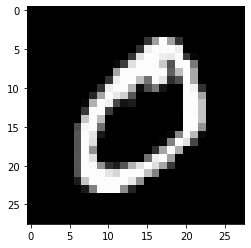

In [91]:
print('Image:')
plt.imshow(x_train[1],cmap='gray');

In [88]:
# Output information:
print('Train output shape:',y_train.shape)
print('Test output shape:',y_test.shape)
print('Data type:',y_train.dtype)

Train output shape: (60000,)
Test output shape: (10000,)
Data type: uint8


In [89]:
print('Unique labels:',np.unique(y_train))
print('First 10 outputs:')
print(y_train[:10])

Unique labels: [0 1 2 3 4 5 6 7 8 9]
First 10 outputs:
[5 0 4 1 9 2 1 3 1 4]


# Preprocess the data

In [92]:
# Normalize the data, flatten inputs, and convert datatype
x_train = x_train.reshape(60000, 784). \
                    astype('float32') / 255

x_test = x_test.reshape(10000, 784) \
                    .astype('float32') / 255

### Clear logs

In [93]:
# Clear any logs from previous runs
!rm -rf $logdir 

# Load standard NN components

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [95]:
# Initialize model constructor
model = Sequential()
# Add layers sequentially
model.add(Dense(300, activation='relu', \
                    input_shape=(784,)))

# Second..
model.add(Dense(200, activation='relu'))

# Third..
model.add(Dense(100, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [96]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [97]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# train the model

NO_EPOCHS = 5
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=NO_EPOCHS,
                    validation_split=0.2,
                    callbacks = [tensorboard_callback])

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 112us/sample - loss: 0.2463 - accuracy: 0.9257 - val_loss: 0.1124 - val_accuracy: 0.9661
Epoch 2/5
48000/48000 [==============================] - 5s 100us/sample - loss: 0.0989 - accuracy: 0.9702 - val_loss: 0.1166 - val_accuracy: 0.9673
Epoch 3/5
48000/48000 [==============================] - 5s 103us/sample - loss: 0.0679 - accuracy: 0.9795 - val_loss: 0.1098 - val_accuracy: 0.9697
Epoch 4/5
48000/48000 [==============================] - 5s 98us/sample - loss: 0.0524 - accuracy: 0.9844 - val_loss: 0.0940 - val_accuracy: 0.9746
Epoch 5/5
48000/48000 [==============================] - 5s 99us/sample - loss: 0.0415 - accuracy: 0.9884 - val_loss: 0.1174 - val_accuracy: 0.9736


In [98]:
test_scores = model.evaluate(x_test, y_test, verbose=0)
#print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Test accuracy: 0.976


In [99]:
history.history

{'loss': [0.24633877392858267,
  0.09892264503830422,
  0.06790228649042547,
  0.052369205839039444,
  0.04146847295035453],
 'accuracy': [0.92572916, 0.97022915, 0.9795, 0.98439586, 0.9884167],
 'val_loss': [0.11235911253094673,
  0.1166048958428825,
  0.10980698866552363,
  0.09399090677887822,
  0.1173717411714509],
 'val_accuracy': [0.96608335, 0.9673333, 0.96975, 0.9745833, 0.97358334]}

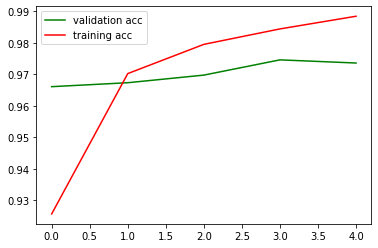

In [100]:
# plot accuracy
plt.plot(range(NO_EPOCHS),history.history['val_accuracy'],c='g',label='validation acc')
plt.plot(range(NO_EPOCHS),history.history['accuracy'],c='r',label='training acc')
plt.legend();

In [102]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 316,810
Trainable params: 316,810
Non-trainable params: 0
_________________________________________________________________


In [101]:
!tensorboard --logdir $logdir

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.0.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


# (Vanilla) ANN Network structure
* Any Neural Network with one hidden layer can be a Universal Function Approximator. Source: [https://en.wikipedia.org/wiki/Universal_approximation_theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem)
* The number of input nodes are equal to the number of features
* The number of output nodes are equal to the number of classes (for classification tasks)
* A bias term is added to every layer that only feeds in a 1, that adds an extra degree of freedom for every functional input value to the next function
* For the input layer we send in the (standardized) values.
* For the output layer we often use a softmax function (multi-class classification) or a sigmoid function (binary classification). Softmax only works if the classes are mutually exclusive, i.e. we only try to label one pattern in every training example.

# How deep should we go?
* We can overfit Neural Nets, one way to combat that is by using dropout and regularization
* Predictions will usually be better when we increase depth of network and widen it (increase the number of neurons in every layer)

# Activation Functions
* Classically the sigmoid function was used in the hidden layers (simplest function between 0 - 1). Logit function.
* Nowadays it is more common to use the ReLU (Rectified Linear Unit). Much quicker! For deep networks sigmoid might not want to converge at all. Much better to handle exploding and vanishing gradients (Leaky Relu). Can also combat that with *Batch Normalization*.


# Training algorithm steps
* Train a model to make a prediction
* Compute distance between predictions and true values
* Modify weights and biases to lower error


# Overfitting
* Mostly because our network has too many degrees of freedom (neurons in the network)
* Can use L1 and L2 regularization on the cost function
* Drop out (used to mitigate the effects of too many degrees of freedom)

# ANNs are not great at classifying images
* We don't make use of the image shapes and curves. Shape info is lost when we flatten arrays.


# ANN One Layer Softmax Classification

What we accomplished in this section:

- Create a softmax regression function that is a model for recognizing MNIST digits, based on looking at every pixel in the image
- Use Tensorflow to train the model to recognize digits by having it "look" at thousands of examples (and run our first Tensorflow session to do so)
- Check the model's accuracy with our test data

# device placement

In [ ]:
import tensorflow as tf

In [ ]:
# Place tensors on the CPU
with tf.device('/cpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
print(c)


# tf.data.DataSet

In [ ]:
def pre_process(x, y):
    #normalize and expand
    x = tf.cast(x, tf.float32)/255.
    x = tf.expand_dims(x, -1)

    #cast the labels
    y = tf.cast(y, tf.int32)
    return x, y

In [ ]:

def create_dataset(x, y):  
    #convert to tensors and shuffle
    dataset = tf.data.Dataset.from_tensor_slices((x , y)).shuffle(len(x)-1)

    #extract batches
    dataset = dataset.batch(32)

    #preprocess the batch
    dataset = dataset.map(pre_process, num_parallel_calls = 4)

    return dataset

In [ ]:
# Transform data (flatten input, convert to floating point and normalize)
# Then convert to Dataset
dataset = tf.data.Dataset.from_tensor_slices(
    (x_train.reshape(60000, 784).astype('float32') / 255, y_train))
dataset

In [ ]:
# Shuffle the dataset
dataset = dataset.shuffle(buffer_size=60000)
dataset

In [ ]:
# Create batches
dataset = dataset.batch(64)
dataset # creates a new dimension

# Advanced tf2 model training

Work in progress (porting to tf2)

In [ ]:
# Define hyperparameters and input size

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [ ]:
# Define neuron layers (ReLU in hidden layers)
# We'll take care of Softmax for output with loss function

def neuron_layer(X, n_neurons, name, activation=None):
    # X input to neuron
    # number of neurons for the layer
    # name of layer
    # pass in eventual activation function
    n_inputs = int(X.shape[1])

    # initialize weights to prevent vanishing / exploding gradients
    stddev = 2 / np.sqrt(n_inputs)
    init = tf.initializers.TruncatedNormal(stddev=stddev)

    # Initialize weights for the layer
    W = tf.Variable(init((n_inputs, n_neurons)), name="weights")
    # biases
    b = tf.Variable(tf.zeros([n_neurons]), name="bias")

    # Output from every neuron
    Z = tf.matmul(X, W) + b
    if activation is not None:
        return activation(Z)
    else:
        return Z

In [ ]:
hidden1 = neuron_layer(x_train, n_hidden1, name="hidden1",
                       activation=tf.nn.relu)
hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                       activation=tf.nn.relu)
logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [ ]:
# Training step with Gradient Descent

learning_rate = 0.001

optimizer = tf.keras.optimizers.Adam(learning_rate)

In [ ]:
# Define loss function (that also optimizes Softmax for output):


# logits are from the last output of the dnn
xentropy = tf.keras.losses.sparse_categorical_crossentropy(y_train, logits, from_logits=True)
loss = tf.reduce_mean(xentropy, name="loss")

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [ ]:
# @tf.function
# def train_step(x, label):
#     with tf.GradientTape() as tape:
#         predictions = model(x)
#         loss = loss_object(label, predictions)
#     gradients = tape.gradient(loss, model.trainable_variables)
#     optimizer.apply_gradients(zip(gradients, model.trainable_variables))
# 
#     train_loss(loss)
#     train_accuracy(label, predictions)